In [1]:
# this is a magic command and says that we want our plots to showup inline
%matplotlib inline              

import matplotlib.pyplot as plt # that matplotlib library
import seaborn as sns           # mostly we use this to set aesthetics that don't make my eyes bleed
sns.set()                       # sets the aesthetics

In [2]:
import numpy as np

In [3]:
x = np.linspace(0, 2 * np.pi, 50)  # create an array of values [0, 2pi) with 50 pts in between
y1 = np.sin(x)  # evaluate sin over these points
y2 = np.cos(x)  # same but cos
yrandom = np.random.normal(size=500)  # just 500 pts of random data all mean=0 std=1
yrandom2 = np.random.random(50)  # 50 points of data [0, 1)

By default plotting twice in a cell puts it on the same graph

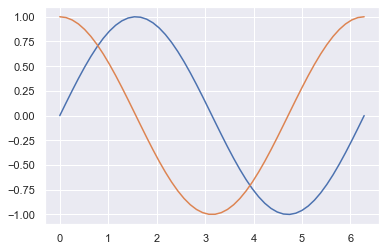

In [4]:
plt.plot(x, y1)  # plot x v y1 (sin)
plt.plot(x, y2)

If we want to split a graph into multiple plots we can use the subplot option, this works by defining the number (`x`) of subplots across and the number of subplots down (`y`) and then choosing which plot to in order left to right, up to down to  `plt.subplot(x, y, n)`. The return is an axes object that has all the same plot functions.

In [5]:
plt.subplot?

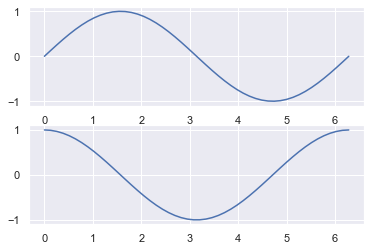

In [6]:
ax1 = plt.subplot(2, 1, 1)
ax1.plot(x, y1)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(x, y2)

The above functions automatically create the figure.  By explicitly creating it we can then set things like the size of the figure, plot more than one figure per cell, and do a lot of other things.

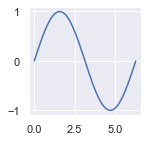

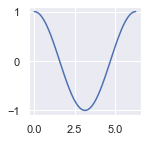

In [7]:
for y in (y1, y2):
    fig = plt.figure(figsize=(2,2))  #if we define figure explicitly we can set the size
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y)

We can plot histograms too.  Using `plt.show()` is another way to do multiple graphs per cell.  (The semicolon at the end just prevents printing of the value of the plt function which is long and not useful)

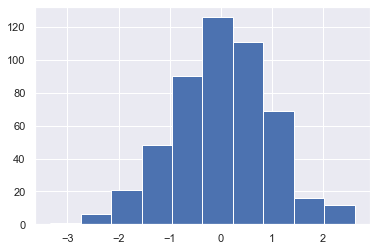

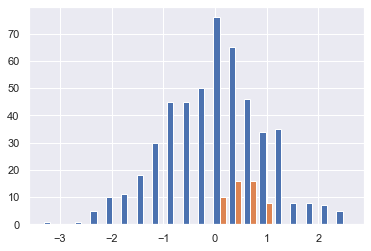

In [8]:
plt.hist(yrandom, bins=10);
plt.show()
plt.hist([yrandom, yrandom2], bins=20);

And scatter plots.  The `s` argument defines the point size in pixels, and `c` argument is the color, which can be a an array of number each 0 to 1 which are mapped to a color spectrum for visualization.  Please read the documentation for more information.

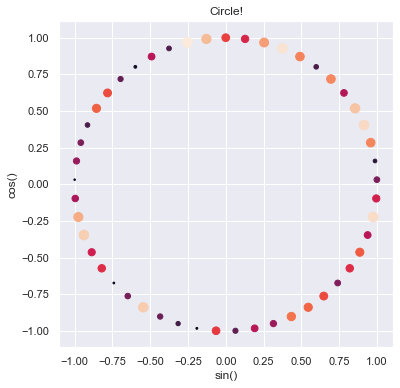

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y1, y2, s=yrandom2*100, c=yrandom2);

# we can also set labels and titles
ax.set_xlabel("sin()")
ax.set_ylabel("cos()")
ax.set_title("Circle!");

Our first foray into scikit-learn will be to grab data from one of their example datasets.  After executing tab complete the datasets module to see what there is or read [sklearn docs](https://scikit-learn.org/stable/).  There is a complete list there.

In [10]:
from sklearn import datasets

This will load the iris dataset which comes as an object that behaves like a dictionary in that you can access `.keys()` or using `.data`/`.target`/etc

In [11]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
data = iris.data
print(iris.target_names)
print(data[:5])

['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
target = iris.target
print(set(target))  # quick and easy way to see the possible values
print(iris.target_names)

{0, 1, 2}
['setosa' 'versicolor' 'virginica']


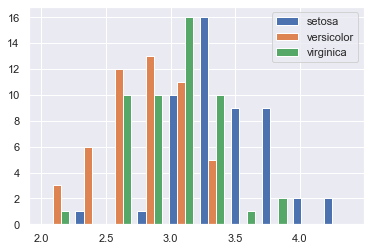

In [15]:
sepal_width = data[:, 1]

tmp = [] 
for i in {0, 1, 2}:
    tmp.append(sepal_width[target == i])  # select the data from sepal width such that(s.t.) they all have the same 
                                          # target value

# this works because we are using a list of arrays one for each target value
plt.hist(tmp, label=iris.target_names, bins=10)
plt.legend();

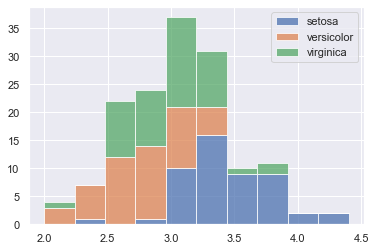

In [16]:
plt.hist(tmp, stacked=True, label=iris.target_names, alpha=.75, bins=10)
plt.legend();

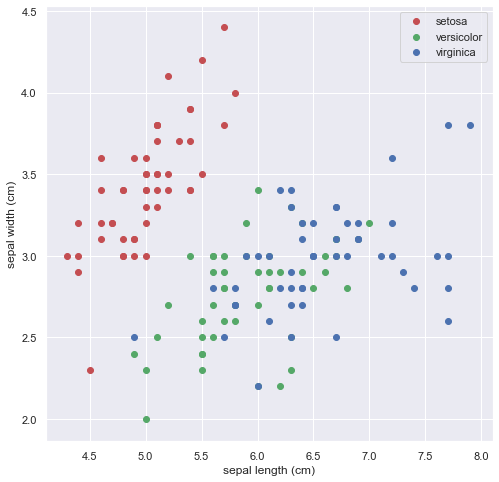

In [17]:
fig, ax = plt.subplots(figsize=(8,8)) 
colors = ['r', 'g', 'b']  # this only works because the target values are 0..n-1, could also use a dict
for t in {0, 1, 2}:
    ax.scatter(data[target==t, 0], data[target==t, 1], c=colors[t], label=iris.target_names[t])
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.legend()

What can we see here?  Setosa is easy to differentiate based upon sepal width and length from the other two...  There are algorithms that do basically this and we'll be learning about them during the rest of the semester.

We can also use custom tick label.  Below I'll open a CSV file that has text, and read it into two lists, one for dates, and the other for the closing prices

In [33]:
import csv
reader = csv.reader(open("AMZN.csv"))
next(reader)  # skip the first row
dates = []
prices = []

for row in reader:
    dates += [row[0]]
    prices += [float(row[2])]

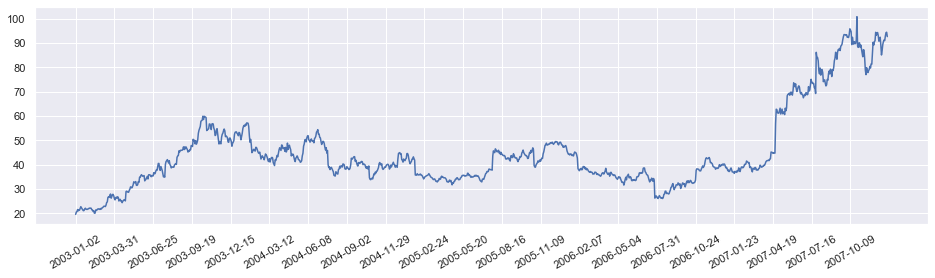

In [51]:
fig, ax = plt.subplots(figsize=(16,4)) 
ax.plot(range(len(dates)), prices)
ax.set_xticks(range(len(dates))[::60])         #set's the location of the ticks
ax.set_xticklabels(dates[::60], rotation=30);  #print a tick at every 60th day 